# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.19858669 2.11809813 2.11292315 2.97892324 2.61286107 2.22838988
 2.44057292 2.98785752 2.57252647 2.33471142]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

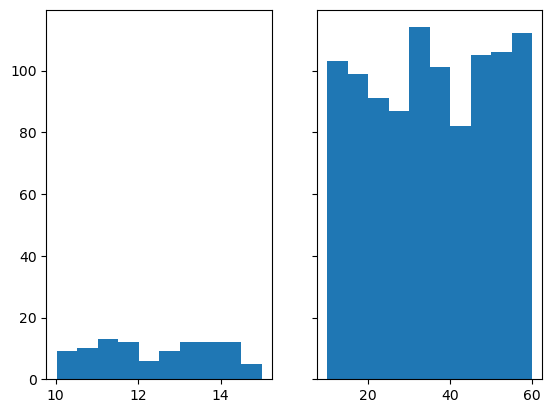

In [11]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def uniform_dist(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    randoms  = bottom + (ceiling-bottom)*x
    return randoms
graph1data = uniform_dist(10,15,100)
graph2data = uniform_dist(10,60,1000)

fig, [plot1, plot2] = plt.subplots(1,2, sharey=True)

plot1.hist(graph1data,bins=10)
plot2.hist(graph2data,bins=10)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
#Both plot show a uniform distribution of continuous values. 
# The data is random float numbers in a certain range (given by bottom and ceiling).
# As the second plot holds much more data (1000 instead of just 100), it has higher data counts in total and also a bit more
# variance overall, but still the distribution does not show a clear maximum anywhere.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

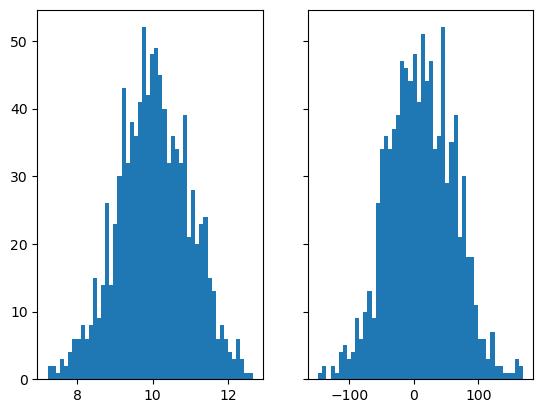

In [24]:
# your code here
from scipy.stats import norm

def normal_dist(mu, sigma, count):
    return mu + sigma * np.random.randn(count)

graph1data = normal_dist(10,1,1000)
graph2data = normal_dist(10,50,1000)

fig, [plot1, plot2] = plt.subplots(1,2, sharey=True)

plot1.hist(graph1data,bins=50)
plot2.hist(graph2data,bins=50)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
# Both graphs show 50 bins holding in total 1000 values. 
# The first graph was build around a mean of 10 with a std of 1, so most values can be observed between 8 and 12.
# The second graph was also build around a mean of 10, with a std of 50, the variance is much higher. So in this graph,
# values are mostly between -100 and 100. As it is normally distributed data, it is a symmetric distribution around the mean.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

(35952, 15)


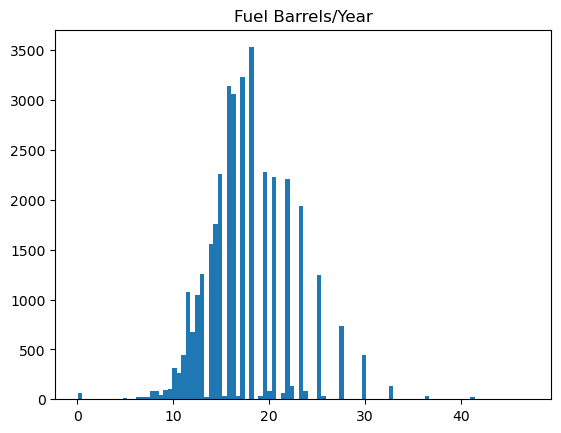

In [34]:
# your code here
import pandas as pd

vehicles = pd.read_csv("vehicles.csv")
print(vehicles.shape)
# vehicles.head(3)

plt.hist(vehicles["Fuel Barrels/Year"],bins=100)
plt.title("Fuel Barrels/Year")
plt.show()

2. CO2 Emission Grams/Mile 

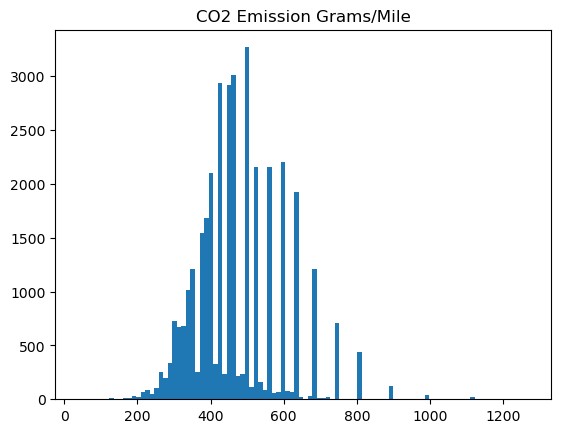

In [33]:
# your code here
plt.hist(vehicles["CO2 Emission Grams/Mile"],bins=100)
plt.title("CO2 Emission Grams/Mile")
plt.show()

3. Combined MPG

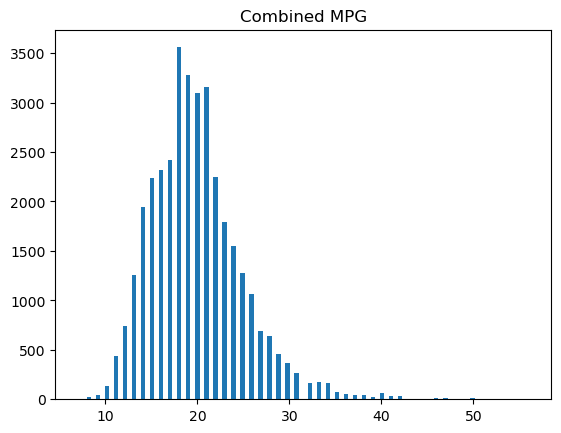

In [35]:
# your code here
plt.hist(vehicles["Combined MPG"],bins=100)
plt.title("Combined MPG")
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
# all three seem to be nearly normally distributed. It looks like nearly symmetric distributions centered around one mean.
# Graph 1 and 2 show 2 peaks if in 50 bins, but only one in 100 bins. A normal distribution needs a definite single mean,
# that seams to be the case with more bins. 
# The symmetry is also not quite given in all three graphs. They are all a bit skewed with more data in the small values.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

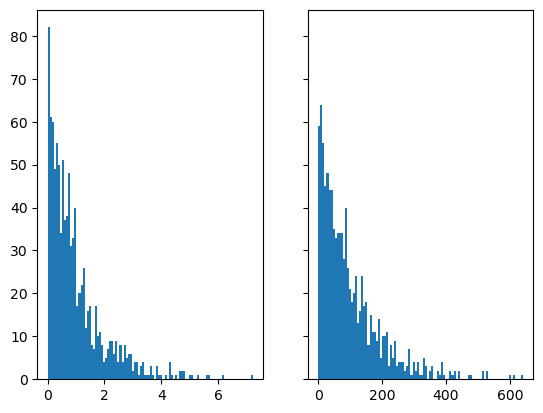

In [38]:
# your code here
def exp_dist(mu, count):
    return np.random.exponential(mu, size=count)

graph1data = exp_dist(1,  1000)
graph2data = exp_dist(100,1000)

fig, [plot1, plot2] = plt.subplots(1,2, sharey=True)

plot1.hist(graph1data,bins=100)
plot2.hist(graph2data,bins=100)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
# Both graphs show an exponential distribution of 1000 datapoints. The first one has a mean of 1, so most observations are
# between 0 and 2, it is much less common for higher values to occur. However, there is not a clear peak at 1, as values
# shortly below 1 and shortly above one are just as probable to occur, so this curve has a flat top.
# Graph 2 has a mean of 100. Most observations are between 0 and 200.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [43]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

#unit of time = minutes
#expectation: 1 visit per 10 units of time -> rate

lambda_inv = 10/1 #minutes/visit
exp_dist = expon(scale = lambda_inv)

print("CDF 15:", exp_dist.cdf(15)) # 77.7% chance that a customer spends 15 minutes or less in the bank

CDF 15: 0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [44]:
# your answer here
print("1-CDF 15:", 1-exp_dist.cdf(15)) # 22.3% chance that a customer has to stay more than 15 minutes 

1-CDF 15: 0.2231301601484298
